---
layout: page
title: Retirement Expenses
---

In [1]:
""" import library and package dependencies """
from sys import path
path.insert(0, '../src')
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import display, Markdown

from chart_format import StandardChart, LogChart, PercentileChart

The Association of Superannuation Funds of Australia Limited (ASFA) is the largest policy, research and advocacy body for the Australian superannuation (pension) industry; a non-profit advisor to the Australian government.

ASFA have published a "retirement standard" of living expenses that lists how much money the average Australian individual or couple spends each year in retirement. Their latest figures are based on [previous 2018 research data](https://www.superannuation.asn.au/wp-content/uploads/2023/09/2018-ASFA-Retirement-Standard-Budgets-Review.pdf) (subsequently adjusted for inflation each quarter). 

- [ASFA Retirement Standard (see superannuation.asn.au)](https://www.superannuation.asn.au/resources/retirement-standard#DetailedBreakdowns)

- [Retirement Planner / Income Calculator (see moneysmart.gov.au)](https://moneysmart.gov.au/retirement-income/retirement-planner)


## ASFA Retirement Lifestyles

The ASFA calculate retirement expenses for a "modest" lifestyle and a "comfortable" retirement lifestyle.

The ASFA define a "modest" retirement as having very basic and limited expenses, a cheap old car, and a _"need to keep close watch on utility costs, and make sacrifices"_.

The ASFA define a "comfortable" retirement, with approximately 55% higher expenses than the "modest" level, that enables a retiree _"to be involved in a broad range of leisure and recreational activities and to have a good standard of living through the purchase of things such as household goods, private health insurance, a reasonable car, good clothes, a range of electronic equipment, and domestic and occasionally international holiday travel"_. 

Both lifestyle levels _assume retirees own their own home_ and are relatively healthy.

ASFA calculate the expenses for retirees aged 85 and over are approx 7% lower than those aged 65, because over 85 years any increased medical expenses are offset by significant reduction in travel and leisure expenses.

In [2]:
""" Load data """
# Given price targets data is manually collected it is easier to use a markdown table than csv file
csv_file = '../data/asfa-retirement-standard.md'
# Read markdown table as csv format with '|' as separator and skip the row of '----' separators
df = pd.read_csv(csv_file, sep='|', skipinitialspace=True, skiprows=[1])
# Drop the first and last (empty) columns due to how the markdown table is imported
df = df.iloc[:, 1:-1]  
# Remove leading/trailing white spaces from column names
df.columns = df.columns.str.strip()
# Remove leading/trailing white spaces from data
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

In [3]:
""" Data Transformation """

# set Date to last day of the month
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')
df['Date'] = df['Date'] + pd.offsets.MonthEnd(0)
df.set_index('Date', inplace=True)

# Set 'last_index' to the last date with a valid value (so I can display 'as of <date>' in chart title)
last_index = df.last_valid_index()

In [4]:
# """ Debug ASFA Data"""
# calculate the percentage difference between the 'Comforable 65' and 'Modest 65' columns.
#df['ComfortableDiffPercent'] = (df['Comfortable 65'] - df['Modest 65']) / df['Modest 65'] * 100

# calculate the percentage difference between the 'Comfortable 65' and 'Comfortable 85' columns.
#df['Comfortable85DiffPercent'] = (df['Comfortable 85'] - df['Comfortable 65']) / df['Comfortable 65'] * 100

In [5]:
# df.tail(20)
# int(df['ComfortableDiffPercent'].mean().round(0))
# A "comfortable" lifestyle is approx 55% higher than the "modest" level

#int(df['Comfortable85DiffPercent'].mean().round(0))
# A 85 year old "comfortable" lifestyle is approx 7% lower than the "comfortable" 65 year old level

In [6]:
# """ Debug ASFA Inflation """
# df_inflation = pd.DataFrame()
# Restore dataframe from previous notebook
# %store -r df_inflation

In [7]:
## Add a column to the df data frame called 'CPI' and set the value to the df_inflation GCPIAGYP value for the same period
#df['CPI'] = df.index.map(lambda x: df_inflation.loc[x]['GCPIAGYP'] if x >= datetime(2018, 9, 30) else None)
#df['Comfortable 65 CPI'] = df.index.map(lambda x: df.loc[x]['Comfortable 65'] if x >= datetime(2018, 9, 30) else None)
## Running balance is previous quarter end plus annual inflation; calculated as previous quarter end * CPI then divided by 4 to get a quarterly inflation amount
#df['Comfortable 65 CPI'] = df['Comfortable 65 CPI'].shift(1) + ((df['Comfortable 65 CPI'].shift(1) * (df['CPI'] / 100)) / 4)

In [8]:
""" Chart variables """
lifestyle = {
    "modest": {
        "color": "red",
        "factor": 100,
    },
    "comfortable": {
        "color": "orange",
        "factor": 150,
    },
    "four-star": {
        "color": "green",
        "factor": 200,
    },
    "luxury": {
        "color": "blue",
        "factor": 300,
    },
    "opulent": {
        "color": "darkviolet",
        "factor": 500,
    },
}

In [9]:
# Get the first two values from lifestyle dictionary
asfa_lifestyle = dict(list(lifestyle.items())[:2])

In [10]:
# for each lifestyle in asfa_lifestyle dictionary get the last values from each column
# and add to the asfa_lifestyle dictionary
for key in asfa_lifestyle:
	asfa_lifestyle[key]['65'] = df[key.capitalize() +' 65'].iloc[-1]
	asfa_lifestyle[key]['85'] = df[key.capitalize() +' 85'].iloc[-1]
	asfa_lifestyle[key]['date'] = df.index[-1]

In [11]:
# Create a Markdown table
# set the markdown table header cell background color to the color of the lifestyle
table =  "| Lifestyle Expenses | " + " | ".join(key.capitalize() + " Aged 65 | " + key.capitalize() + " Aged 85 " for key in asfa_lifestyle.keys()) + " |\n"
table += "|-----------|-" + "|".join("--:|--:" for _ in asfa_lifestyle.keys()) + "|\n"
table += "| Annual    | " + "| ".join("${:,.0f} | ${:,.0f}".format(float(value['65']), float(value['85'])) for value in asfa_lifestyle.values()) + " |\n"
#table += "| ".join("${:,.0f}".format(float(value['85'])) for value in asfa_lifestyle.values()) + " |\n"
table += "| Monthly   | " + "| ".join("${:,.0f} | ${:,.0f}".format(float(value['65'])/12, float(value['85'])/12) for value in asfa_lifestyle.values()) + " |"

# Display the table
display(Markdown(f"""
The ASFA retirement standard _minimum_ living expenses for a retired couple as of {pd.to_datetime(asfa_lifestyle['modest']['date']).strftime('%B %Y')}:
"""))
display(Markdown(table))



The ASFA retirement standard _minimum_ living expenses for a retired couple as of December 2024:


| Lifestyle Expenses | Modest Aged 65 | Modest Aged 85  | Comfortable Aged 65 | Comfortable Aged 85  |
|-----------|---:|--:|--:|--:|
| Annual    | $47,470 | $44,152| $73,077 | $67,714 |
| Monthly   | $3,956 | $3,679| $6,090 | $5,643 |

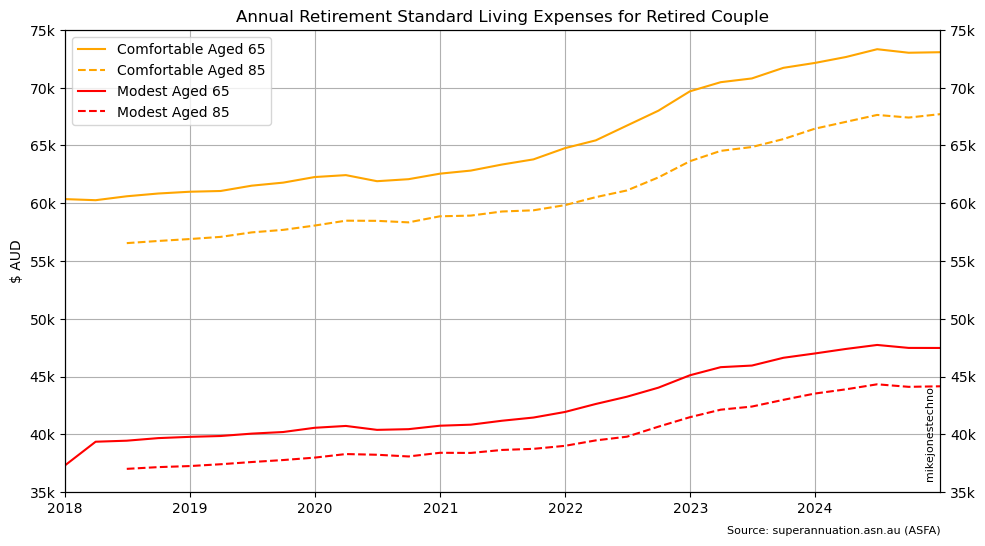

In [12]:
# Plot the columns ending in '85' with a dashed line style
# Plot the columns ending in '65' with a solid line style
# For each column starting with asfa_lifestyle.keys() plot the column in the asfa_lifestyle color

plt.figure(figsize=(10, 6))
# for key in asfa_lifestyle.keys() in REVERSE order
for key in reversed(asfa_lifestyle.keys()):
	plt.plot(df.index, df[key.capitalize() + ' 65'], linestyle='-', color=lifestyle[key]['color'], label=key.capitalize() + ' Aged 65')
	plt.plot(df.index, df[key.capitalize() + ' 85'], linestyle='--', color=lifestyle[key]['color'], label=key.capitalize() + ' Aged 85')

# DEBUG - plot the 'Comfortable 65 CPI' column to verify that ASFA data really is adding the average CPI 
# plt.plot(df.index, df['Comfortable 65 CPI'], linestyle='--', color='lightgrey', label='Comfortable 65 CPI', linewidth=2)

ax = plt.gca()
plt.ylabel('$ AUD')
plt.title('Annual Retirement Standard Living Expenses for Retired Couple')
plt.grid(True)
plt.ylim(ymin=35e3, ymax=75e3)
left_limit = pd.to_datetime('2018-01-01')
# last date in Date column
right_limit = pd.to_datetime(df.index[-1])

# y-axis labels formatted in thousands with no decimal places
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}k'.format(x*1e-3)))
# clone to right side
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}k'.format(x*1e-3)))
plt.xlim(left=left_limit, right=right_limit)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format major ticks as years
# xaxis labels printed horizontally not at a 45 degree angle
ax.xaxis.set_tick_params(rotation=0)
# xaxis labels printed centered on the tick
for label in ax.get_xticklabels():
	label.set_horizontalalignment('center')
ax.legend()

chart_source = 'Source: superannuation.asn.au (ASFA)'
figtext_adjust = 0
plt.figtext(1, 0.04 - figtext_adjust, chart_source, ha="right", fontsize=8)
plt.subplots_adjust(right=1, bottom=0.11)
plt.figtext(0.995, 0.132 + figtext_adjust, 'mikejonestechno', ha="right", fontsize=8, rotation=-270)

plt.show()

## Misleading Data

> ⚠ WARNING: CHOICE say the ASFA Retirement Standard is misleading.
>
>"The expert view is that these standards may be misleading (too high). The Productivity Commission said these standards equate to a retirement income that is 'more than many people spend _before_ retirement', and that they are "no more than an arbitrary benchmark that should be ignored in policymaking".
>
> Source: [CHOICE: How much do you really need to retire?](https://www.choice.com.au/money/financial-planning-and-investing/superannuation/articles/our-new-retirement-standards)

### Fake News and Misinformation 

CHOICE is quoting statements from the Productivity Commission that appear to be based on claims made by the Grattan Institute about the earlier ASFA 2009 research. The ASFA refuted these claims in their 2018 research stating that data from the Household Expenditure Survey by the Australian Bureau of Statistics indicates the mean _and median_ disposable incomes of existing retirees *are higher than* the ASFA comfortable retirement standard.

While true that many people may be on a "modest" lifestyle _before_ retirement, *actual* expenses show the "comfortable" lifestyle is reasonably close to current standard of living (less mortgage); the ASFA model appears reasonably accurate for a baseline model. 

> I believe the ASFA could be a useful benchmark, subject to validation with *actual* personal expenses. Personalized data will tend to be more accurate than a generalized model.

## Improving Accuracy and Assumptions

### Simplified Inflation

The ASFA standard is based on their 2018 research that they regularly adjust for inflation. 

ASFA acknowledge that the CPI inflation data bundles goods and services that differ to the component budgets used in the retirement standard, but despite recognizing this potential source of inacuracy, the ASFA still apply a generic average inflation. The model could be more accurate if each component budget line item was individually adjusted, given cost of some goods can increase significantly while other expenses remain stable.

> "All figures in today’s dollars using 2.75% AWE as a deflator and an assumed investment earning rate of 6 per cent."

### Outdated Relevance

ASFA claim that adjusting for inflation _"over the short term — a period which various researchers have indicated is in the order of around seven years — will not result in any major errors into the estimates in terms of overall required expenditure and the size of various components of the budgets"_.

ASFA acknowledge over the longer term general living standards and expectations will increase _"in line with economic growth and community prosperity"_.  After seven years technological innovations and price changes can have a dramatic effect on household budget. 

> "When almost everyone else has a mobile phone or a broadband internet connection, it becomes near impossible for anyone to manage without one. An item that was once seen as a relative 'luxury' quickly becomes an absolute 'necessity'. Technology also changes, with, for instance, subscriptions to streaming services substantially replacing purchase of compact discs or DVDs."

ASFA also acknowledge the need to periodically review government policy changes such as tax and health care benefits. 

This means that projecting retirement expenses and balances beyond seven years could become increasingly flawed, particularly beyond fifteen years!

> The ASFA retirement standard is **due for a significant review and entire revision** in 2025-26 (seven years from the 2018 baseline).

### Precise Absolute Values

The ASFA standard has a split for individuals and couples, and for those aged over 85 which they assume will have higher medical expenses but much less international flights and entertainment expenses. It's unclear to me how these absolute values are determined and what the real expense curves may look like.

It's also unfortunate that the model attempts to calculate precise absolute values instead of a range of values with probability of those values.

Imagine that the ASFA forecasts of absolute values are out by +/- 20% to form a standard distribution range of values. Some expense categories could be forecast to greater degree of accuracy than others.

A monte carlo simulation could provide more reliable ranges of expense probability forecasts rather than the absolute values provided by the standard model.

### Lifestyle Sensitivity

It is unclear if or how the ASFA model forecasts price sensitivity for each lifestyle, given that some expense categories such as food are more essential than others. 

Higher inflation on essential services and groceries will have signicant impact to those on a modest retirement that are living day to day and "need to keep close watch on utility costs, and make sacrifices". Those on a comfortable lifestyle will be far less impacted.

Similarly higher inflation on luxury items and travel will have signicant impact to those on a comfortable retirement but almost zero impact to those on a modest lifestyle.

It's not clear to me how accurate the ASFA category weighting is for each lifestyle and if it could be modelled more accurately.

> There is an opportunity to develop a more accurate modelling of expenses, based on my own *actual* expenses, however the ASFA appears reasonably accurate for an initial baseline model.

In [13]:
# ---
# Investments / super balance needed to retire to split to new page.
# 
# ### Conservative Investments
# 
# "An assumed investment earning rate of 6 per cent" is reasonably conservative. The S&P 500 index has a consistent 12 per cent annualized earning rate. If superannuation funds were retained in the reasonably stable S&P 500 instead of more conservative property and bond investments, the amount needed to retire comfortably could be halved.
# 
# ----